In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

You saw earlier in the lesson that template matching is not a particularly robust method for finding vehicles unless you know exactly what your target object looks like. **However, raw pixel values are still quite useful to include in your feature vector in searching for cars.**

While it could be cumbersome to include three color channels of a full resolution image, you can **perform spatial binning on an image and still retain enough information to help in finding vehicles.**

As you can see in the example above, even going all the way down to 32 x 32 pixel resolution, the car itself is still clearly identifiable by eye, and this means that the relevant features are still preserved at this resolution.

A convenient function for scaling down the resolution of an image is OpenCV's cv2.resize(). You can use it to scale a color image or a single color channel like this (you can find the original image here):

Original Size:  (167, 287, 3)


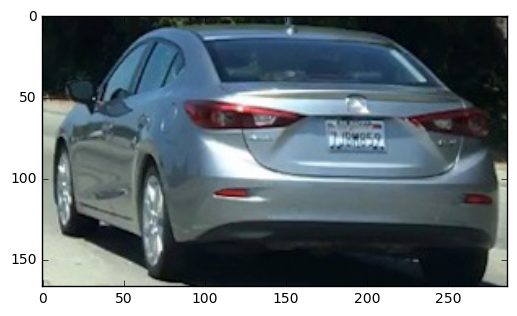

In [17]:
image = mpimg.imread('cutouts/cutout6.jpg')
print("Original Size: ", image.shape)
plt.imshow(image)
plt.show()

Resized:  (32, 32, 3)


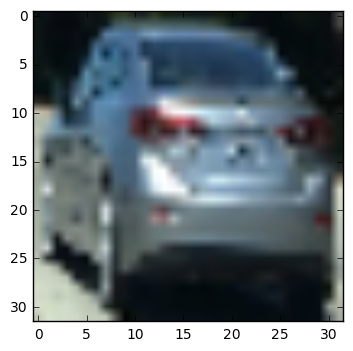

In [18]:
small_img = cv2.resize(image, (32, 32))
print("Resized: ", small_img.shape)
plt.imshow(small_img)
plt.show()

In [19]:
feature_vec = small_img.ravel()
print('Feature Vec:', feature_vec.shape)

Feature Vec: (3072,)


#### `3072` is still a lot of features. Could we get away with a further resolution?

In [20]:
tiny_img = cv2.resize(image, (12, 12))
# plt.imshow(tiny_img)
# plt.show()
feature_vec = tiny_img.ravel()
print('Tiny Image Feature Vec: ', feature_vec.shape)

Tiny Image Feature Vec:  (432,)


---

Now that you've played with color spaces a bit, it's probably a good time to write a function that allows you to convert any test image into a feature vector that you can feed your classifier. So, you goal in this exercise is to write a function that takes in an image, a color space conversion, and the resolution you would like to convert it to, and returns a feature vector. Something like this:

In [21]:
def bin_spatial(img, color_space="RGB", size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)
    
    # User cv2.resize().ravel() to create a feature vector
    features = cv2.resize(feature_image, size).ravel()
    return features

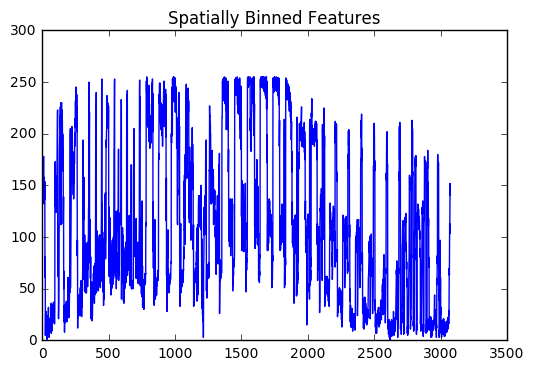

In [24]:
image = mpimg.imread('cutouts/cutout1.jpg')
feature_vec = bin_spatial(image, color_space='RGB', size=(32, 32))
plt.plot(feature_vec)
plt.title('Spatially Binned Features')
plt.show()

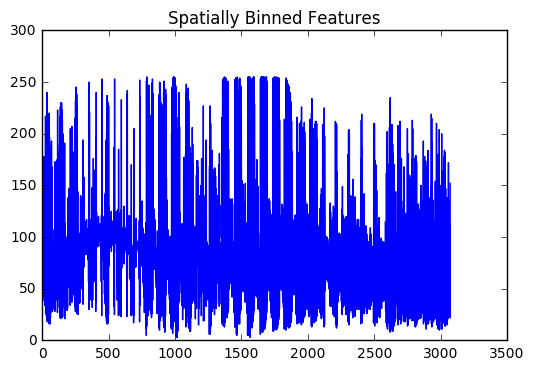

In [26]:
image = mpimg.imread('cutouts/cutout1.jpg')
feature_vec = bin_spatial(image, color_space='HSV', size=(32, 32))
plt.plot(feature_vec)
plt.title('Spatially Binned Features')
plt.show()

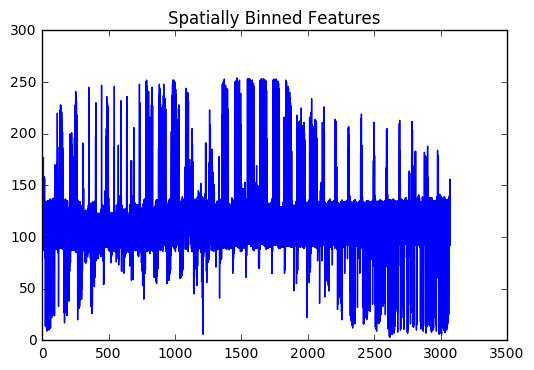

In [27]:
image = mpimg.imread('cutouts/cutout1.jpg')
feature_vec = bin_spatial(image, color_space='LUV', size=(32, 32))
plt.plot(feature_vec)
plt.title('Spatially Binned Features')
plt.show()

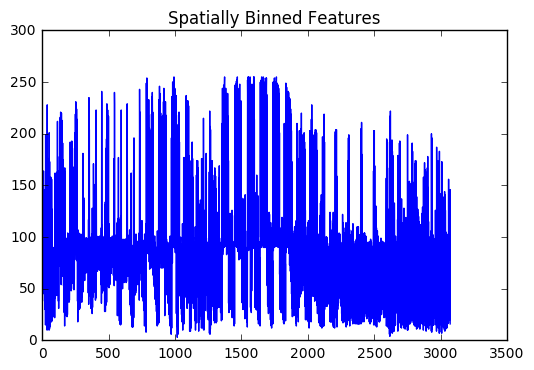

In [28]:
image = mpimg.imread('cutouts/cutout1.jpg')
feature_vec = bin_spatial(image, color_space='HLS', size=(32, 32))
plt.plot(feature_vec)
plt.title('Spatially Binned Features')
plt.show()